In [ ]:
'''
1. The code is to work on the Glass data set using an unsupervised k-means algorithm. This code is implemented using manual 
steps of calculating the centroid still we get a stabilized centroid as the outcome.The calculating of the centroid is based on
approach of Euclidean distance between centroid and data points on the glass data set.

2. The data is read using the pandas read_csv method and converted to a data frame. In this dataset, we need to drop the output
column  and Id column as part of data-preprocessing post-reading data in a data frame.
The initial centroids are based on an assumption basis. We select the number of rows = k value. The centroids
are populated in the data frame where the index=cluster number(number of cluster = k value). With the current centroids, 
we calculate the Euclidean distance between centroid and data points of the data set. The distance calculated is populated in a
data frame with column name = cluster numbers (index of the centroid data frame). From this data frame, we get the min value of 
the row.The corresponding column of that row with minimum value will be the label of that row ie the cluster that row will
belong to.The labels of the rows are stored in a list. This is the current list. At this initial stage,the centroids are still 
not stable. Therefore the cycle continues to find a new set of the centroid. The new centroid is calculated using formula 
as given below

sum of column value given label
__________________________________
count of number of rows for that label.

3. The same process of calculating the Euclidean distance with new centroid and data point is continued. The distance calculated
is populated in a data frame with column name = cluster numbers (index of the centroid data frame). From this data frame, we
calculate the min value of the row. The corresponding column of that row with minimum values will be the label of that row 
ie the cluster that row will belong to. The labels of the rows are stored in a list. This is the current list. The list obtained 
in point 2 now becomes the previous list.

4. Compare the previous list and the current list to see if there are any similarities or differences in the labels of the rows.
If the labels are the same for all the rows the cycle of calculating the centroid ends. The last centroid becomes the final
centroids.If there is a difference then point 2 is continued till the previous and current labels are the same.

5. Once the centroids are stabilized we now calculate the inertia of the k value. For a given k, for each of the clusters, we
calculate the Euclidean distance between the rows of that cluster and the respective centroid. We sum the value of that cluster.
In the end, we sum the values of all the clusters for that k. The total we get is the inertia for that k.

6. We plot the inertia and k values. Using the Elbow method, we find the optimal k value for the given Glass data set. 
    



In [2]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import paired_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
def read_data():
    
    '''
    
    The function reads data and converts into data frame.
    
    Return :-
    data :- Glass data set
    '''
    
    data1=pd.read_csv("D:\Dataset\glass.data",header=None,names=['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])
    
    data=data1[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
    
    
    
    return data


In [4]:
def scale_data(df1):
    
    '''
    Th function is used to scale the data set using the StandardScaler library.
    
    Argument :-
    df1 :- Glass data set
    
    Return :-
    df1 :- Scaled and transformed data frame
    
    '''
    
    scaler=StandardScaler()
    scaler.fit(df1)
    df1=scaler.transform(df1)
    
    return df1

In [5]:
def first_centroid(copy_df,nos_clust):
    
    '''
    The function is to get the centroid based on the k values. The number of centroids is = k value. Pick up that many rows from
    data frame  = number of k values.The first set of the centroid is on an assumption basis.
    
    Argument :-
    copy_df :- copy of the transformed data
    nos_clust :- number of cluster =k value ie number of centroid to pick from data frame
    
    Return :-
    cent_df :- data frame holding the centroid values
    
    
    '''
    cent_df=pd.DataFrame() #Create new dataframe
    list_ind=[]  #List to append random values
    grp=[] #List to hold number of grp =k value
    
    i=0
    #Based on nos of cluster,randomly picking up that many row from dataset as initial centroid
    while i < nos_clust:
    
        val=random.randint(0,copy_df.shape[0]-1)
    
        if val in list_ind:
            continue
        else:
            list_ind.append(val)
            cent_df=cent_df.append(copy_df.loc[val,:],ignore_index=False)
            i=i+1
    
    for x in range(nos_clust):
        grp.append(x) 

    cent_df.index=grp #index here is = cluster number
 
  
    return cent_df

In [6]:
def distance_cal(df,centroid_df):
    
    '''
    The function is to calculate the Euclidean distance between the data point of the data frame and centroids.
    
    Argument :-
    df :- Transformed data frame
    centroid_df :- data frame holding the initial centroid
    
    Return :-
    dist :- Euclidean distance calculation
    
    
    '''
    
    dist=euclidean_distances(df,centroid_df)
    
    return dist

In [7]:
def clust_df(dist1,centroid_df):
    
    '''
    The function is to store the Euclidean distance calculation in a data frame with columns = cluster number for that k value.
    
    Argument :-
    dist1 :- Euclidean distance calculation
    centroid_df :- intital centroid data frame
    
    Return :-
    cluster_df :- data frame holding the distance.
    
    
    '''
    
#Creating a new dataframe to store centroid values for each of the columns.
    cluster_df=pd.DataFrame(dist1,columns=[centroid_df.index],index=df.index)
  
    return cluster_df

In [8]:
def find_label(cluster_df1):
    
    '''
   The function is to find out min value in a row and getting a corresponding label(ie column name). We append the 
    column name(cluster number) in the list. That will correspond to the centroid the row belongs to.
    
    Argument :-
    cluster_df :- data frame with centroid values
    
    Return :-
    temp :- List holding the label 
    
    '''
    
    temp=[]
    
    
    for a, b in cluster_df1.iterrows():
    
    
        temp.extend(b.idxmin())  #returns index of first occurrence of minimum value.
  
    return temp

    

In [9]:
def compare_label(new_label,prev_label):

    '''
     Compare new_label and prev_label, to check for similarity and difference in values. If element differ then continue the process of
    finding new centroid. If all elements are the same, then find the final centroid for further steps.
    
    Argument :-
    new_label :- Current label
    prev_label :- Previous label
    
    Return :-
    ctr :- Array for boolean values after comparing the labels.

    '''
    
    new_lab_series=np.asarray(new_label)
    prev_lab_series=np.asarray(prev_label)

   

    #Compare new_label and prev_label,to check for similary and difference in values.
    ctr=np.array_equal(new_lab_series,prev_lab_series)
    
    
            
    return ctr


In [10]:
def final_centroid(centroid_df,copy_df,df,nos_clust):
    
    '''
    The function is to calculate the final centroid. For this, the code loops through the current centroid, find the euclidean 
    distance with data with current centroid, get the labels of each row, compare with the previous label to see the similarity
    and difference between the labels. If the label is the same in this case current centroid will be the final centroid for the
    given k value else calculate the new centroid (Add the column value given label // count of rows for that label). This will
    now be the current label. This way the loop will continue till the current label and the previous label of the rows in the
    data set are not the same.
        
    Argument :-
    centroid_df :- data frame holding final centroid
    copy_df :- copy of the scaled and transformed data
    df      :- scaled and transformed data frame
    nos_clut :- k value
    
    Return :-
    centroid_df :- Centroids of the given k value
    act_bal :- current label.
    
    
    '''
    
    #Centroid_df= centroids of the k value
    # dist1= Distance between centriod and datapoints
    prev_lab=[] #List holding previous label
    act_lab=[]  #List holding active label
    
    
    
    while True:
    
        prev_lab=act_lab.copy()
   
        dist1=distance_cal(copy_df,centroid_df)
        
        cluster_df1=clust_df(dist1,centroid_df)
        
         
        act_lab=find_label(cluster_df1)
        comp_label=compare_label(act_lab,prev_lab)
        
        df['label']=act_lab
    
    
        if comp_label==True:
        
            break
        else :
        
     
            for cnt in range(nos_clust): #If label are still not equal then get the new centroid by add the value of column for
                                        #a given centroid / count of rows for that centroids
      
                for col in copy_df.columns:
                    cent=df[df.iloc[:,-1]==cnt][col].sum()/df[df.iloc[:,-1]==cnt][col].count()
                    centroid_df.at[cnt,col]=cent

   
    return centroid_df,act_lab
         

In [11]:
#Read Glass data into data frame
df1=read_data()

In [12]:
#Scale the data frame
df=scale_data(df1)


#Convert the series data into new data frame and columns =df1.columns
df=pd.DataFrame(df,columns=[df1.columns])


#making copy of scaled data frame
copy_df=df.copy()

In [ ]:
#Steps to run in loop till the centroid are not stabilized.
clust_tot_dist={} #Dictionary to populate the k:inertia
num=0
total=0
for num in list(range(2,15)):
        total=0
        centroid_df=first_centroid(copy_df,num) #Obtain first assumed centroid
        centroid_df,current_lab=final_centroid(centroid_df,copy_df,df,num) #Get the final stabilized centroid
        label_series=pd.Series(current_lab)  #act_lab list converted to series
        for ind,row in centroid_df.iterrows():
            
            row=row.as_matrix().reshape(1,copy_df.shape[1])
            for ind1,row1 in label_series.items():
                tot=0
                if ind==row1:
            
                    data_series=copy_df.loc[ind1,:].as_matrix().reshape(1,copy_df.shape[1]) # Calculate inertia
                    tot=euclidean_distances(row,data_series)
                    total=total+tot*tot
            
        total=np.asscalar(np.array([total]))
        clust_tot_dist.update({num:total})
        
       

In [17]:
print(clust_tot_dist)

{2: 1558.9125033639905, 3: 1276.3690480193272, 4: 1119.1950190412333, 5: 971.7027250344638, 6: 792.8844763370953, 7: 691.2752870157242, 8: 793.6311515237728, 9: 639.8479157855033, 10: 613.645957857164, 11: 604.8236706094887, 12: 558.7069382080484, 13: 474.99791425590075, 14: 470.5342219831013}


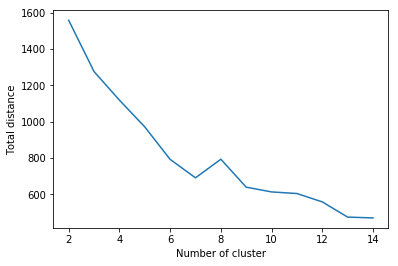

In [18]:
# plot the value k and inertia.
# plt.plot(x_axis, y_axis)
    
plt.plot(*zip(*sorted(clust_tot_dist.items())))
plt.xlabel('Number of cluster')
plt.ylabel('Total distance')
plt.show()
    